# Исследование закономерности определяющие успешность игры 


Нам требуется првоести анализ и выявить закономерности определяющие успешность игры.
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании

# Цель исследования:
     1. Проведите исследовательский анализ данных
     2. Составьте портрет пользователя каждого региона
     3. Проверьте гипотезы
        a. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
        b. Средние пользовательские рейтинги жанров Action и Sports.
        

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Хорошо, когда проект содержит описание c целью и краткий план исследования.👍 </font>

 # Изучение входных данных

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
# импортируем библиотеки

In [10]:
import pandas as pd
try:
    data = pd.read_csv('datasets/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')
data.head(100)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,3.78,2.17,1.31,0.31,NaN,NaN,NaN
96,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN
97,Super Mario Galaxy 2,Wii,2010.0,Platform,3.56,2.35,0.98,0.62,97.0,9.1,E
98,Super Mario Bros. 2,NES,1988.0,Platform,5.39,1.18,0.70,0.19,NaN,NaN,NaN


In [11]:
data.info()
# оценим данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовка данных

 Проверим дубликат

In [12]:
data.duplicated().sum()

0

 Переименовываем колонки

In [13]:
data = data.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'release', 'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales',
                   'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'})

Заглушки. Заменяем значения

In [14]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.

На основе этого, просто заполнил пропусками, ибо восстановить  не представляется возможным.

Преобразуем данные в нужные типы

In [15]:
data.dropna(subset=['release'], inplace=True)
data['critic_score'] = data['critic_score'].fillna(0)
data['user_score'] = data['user_score'].fillna(0)
data['rating'] = data['rating'].fillna('NAN')
data['release'] = data['release'].astype('int')
data['user_score'] = pd.to_numeric(data['user_score']).astype('float')
data.dropna(subset=['name'], inplace=True)

Хотелось бы конвертнуть релиз в инт, а пустые значение в инт нельзя. Значит заменяем пустые значения на 0 , год выпуск проблематично восстановить, да и колличество их не много, на результат не влияет... \

Расчёт суммарных продаж во всех регионах

In [16]:
data['total'] = data['na_sales'] + data['eu_sales'] + \
    data['jp_sales'] + data['other_sales']

In [17]:
temp = data.copy()
list_c = ['name', 'platform', 'release', 'genre',
          'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
    print('-' * 25)
    print(col_l, temp[col_l].unique())
    print(col_l, ' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
          ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2), '%')
    print(col_l, ': кол-во NaN', temp[col_l].isna().sum(),
          ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2), '%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16444 non-null  object 
 1   platform      16444 non-null  object 
 2   release       16444 non-null  int32  
 3   genre         16444 non-null  object 
 4   na_sales      16444 non-null  float64
 5   eu_sales      16444 non-null  float64
 6   jp_sales      16444 non-null  float64
 7   other_sales   16444 non-null  float64
 8   critic_score  16444 non-null  float64
 9   user_score    16444 non-null  float64
 10  rating        16444 non-null  object 
 11  total         16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
name  : кол-во 0 0 , процент 0 0.0 %
name : кол-во 

## Исследовательский анализ данных

 Сколько игр выпускалось в разные годы

Чтобы проанализировать, сколько игр выпускалось в разные года, 
нужно сгруппировать данные по годам и построить гистограмму


[Text(0.5, 0, 'Год'), Text(0, 0.5, 'Количество')]

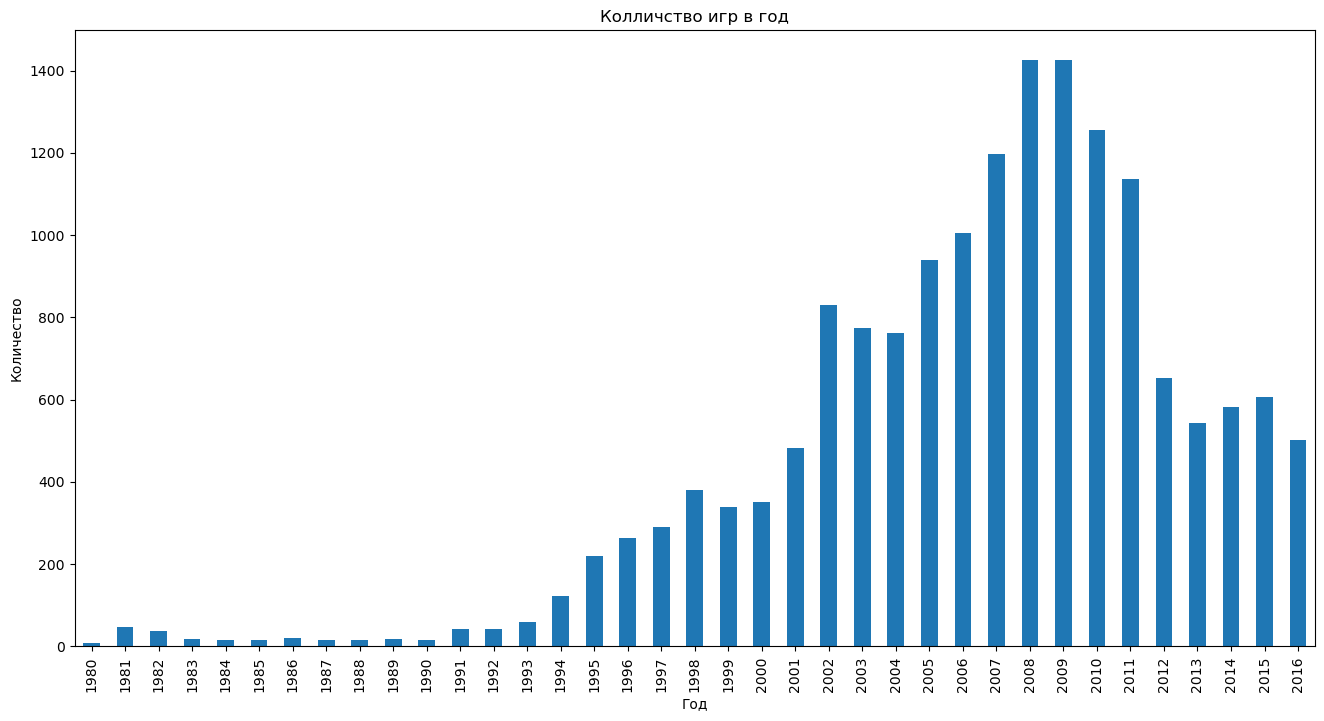

In [18]:
all_release = data.groupby('release')['name'].count()
all_release.plot(kind='bar', figsize=(16, 8), title='Колличство игр в год').set(
    xlabel='Год', ylabel='Количество')

По данной гистограмме видно, что бум по выпуску игр приходится на период 2005-2011 годы. 
Ну и то, то до 1991 года мало совсем.
Заметно, что на 0 много, так мы туда положили пропуски... но не на столько , что бы повлять на общую картину

 Анализ продаж для каждой платформы

Чтобы понять,сколько игр выпускалось по каждой платформе.
Нужно построить аналогичную гистограмму, только сгруппировав по платформе и посчитать сумму выпущенных игр.

[Text(0.5, 0, 'Платформа'), Text(0, 0.5, 'Сумма')]

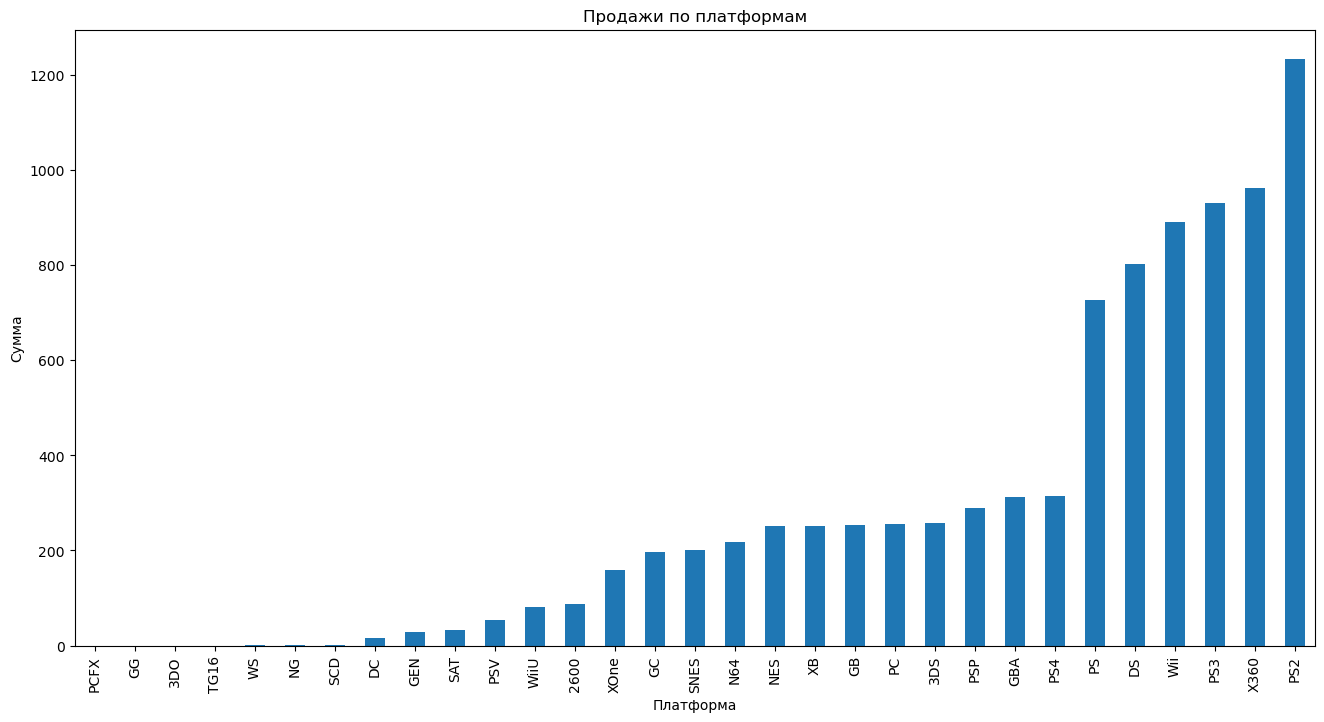

In [19]:
platform = data.groupby('platform')['total'].sum().sort_values()
platform.plot(kind='bar', figsize=(16, 8), title='Продажи по платформам').set(
    xlabel='Платформа', ylabel='Сумма')

Из данной гистограммы отчетливо видно явно топ 6 платформ по количеству игр яв-ся: PS2, X360, PS3, Wii, DS, PS

In [20]:
platform_top = platform.tail(6)
platform_top

platform
PS       727.58
DS       802.78
Wii      891.18
PS3      931.34
X360     961.24
PS2     1233.56
Name: total, dtype: float64

Вынесем топ популярных отдельно

[Text(0.5, 0, 'Год'), Text(0, 0.5, 'Сумма продаж')]

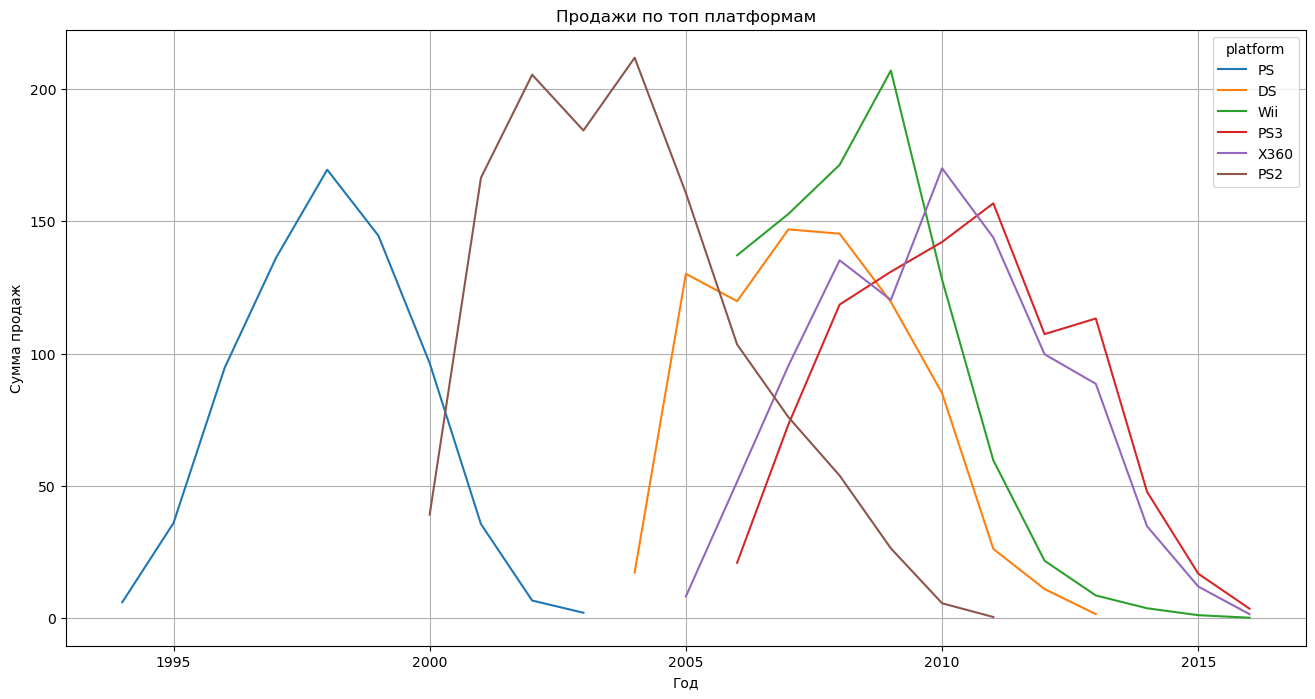

In [21]:
def platform_years(row):
    return (data.query('platform == @row').groupby('release')['total'].sum())


platform_top_years = platform_top.index.to_series().apply(platform_years)
platform_top_years = platform_top_years.T
platform_top_years.fillna(0)
platform_top_years = platform_top_years.query('index >= 1990')
platform_top_years.plot(figsize=(16, 8), grid=True, title='Продажи по топ платформам').set(
    xlabel='Год', ylabel='Сумма продаж')

Попробую описать:

Тут функция , которая на вход имеет наши топ игры. на выходе возвращает сгрупированные данные по году выпуска и продажам.
Далее преобразовываем эти данные , надо было транспонировать таблицу. что бы наглядно вышло на графики, а также пришлось убрать пустые...
Взяли начиная с 1990 года, ибо размах большой получается не очень понятно. Меньше тоже не стали, ибо хотелось PS полностью захватить, как раз для понимания происходящего.
Построили диаграмму, в среднем 9-10 лет цикл продаж игр для каждой платформы.
на всех видно, что первую половину жизненого цикла продаж, продажи растут. Вторую половину жизненого цикла игры, продажи падают. Что и логично.

 Возьмём данные за соответствующий актуальный период

In [22]:
new_data = data.query('release >= 2012')

Поясню почему зажался именно на 5 лет, по вышеизложенным графикам, 
вот судя по PS падения продаж в аккурат накладывается, на выход новой версии PS
соотвественно 100% ТОП продаж среди PS должна быть максимальной у последний версии.
Когда ниже график строили   было понятно , что надо взять тот год когда вырывается скажем так в топ среди PS именно последняя PS4.

<AxesSubplot:xlabel='platform'>

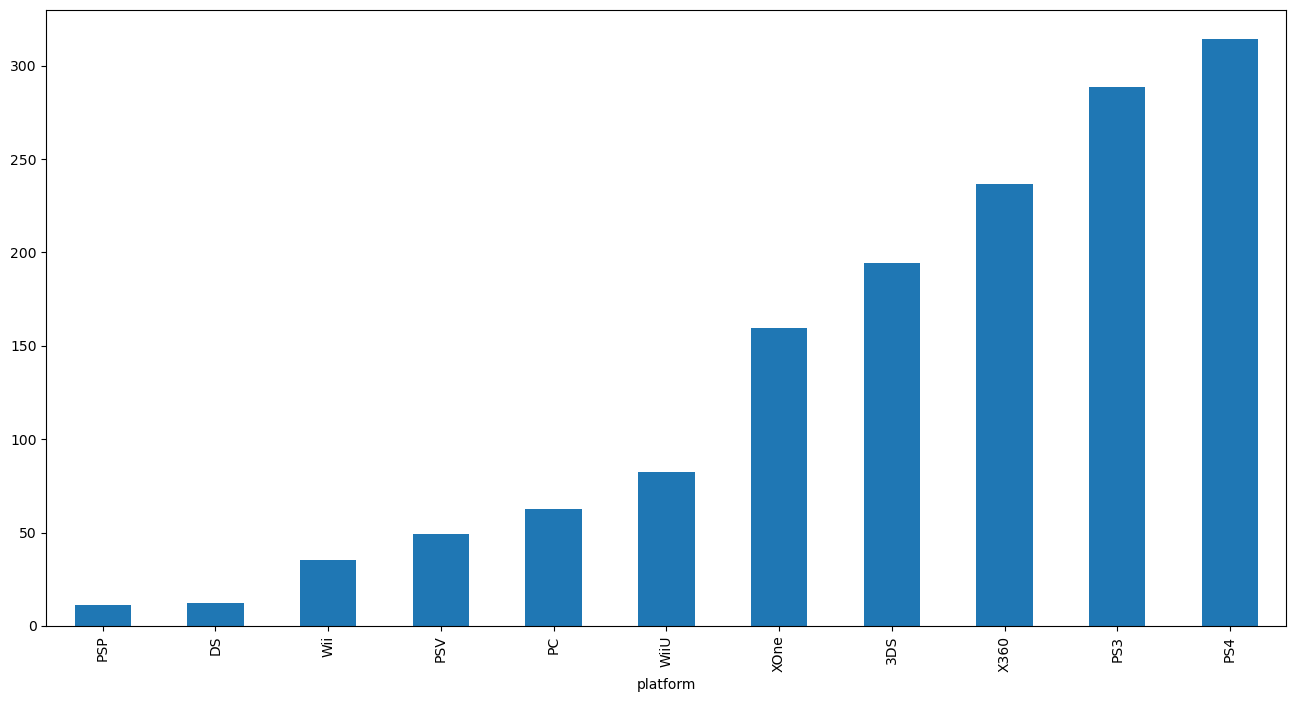

In [23]:
top_data = new_data.groupby('platform')['total'].sum().sort_values()
top_data.plot(kind='bar', figsize=(16, 8))

### Построим график "ящик с усами", таким образом посмотреть продажи для каждой платформы.

In [24]:
new_top_data = top_data.tail(5)
new_top_data = new_top_data.index

count    2886.000000
mean        0.501223
std         1.249157
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: total, dtype: float64

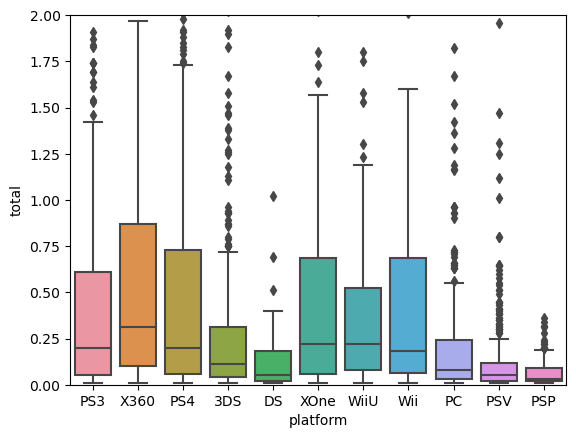

In [25]:
box = sb.boxplot(x='platform', y='total', data=new_data)
box.set_ylim(0, 2.0)

new_data['total'].describe()

[Text(0, 0.5, 'платформа'), Text(0.5, 0, 'сумма')]

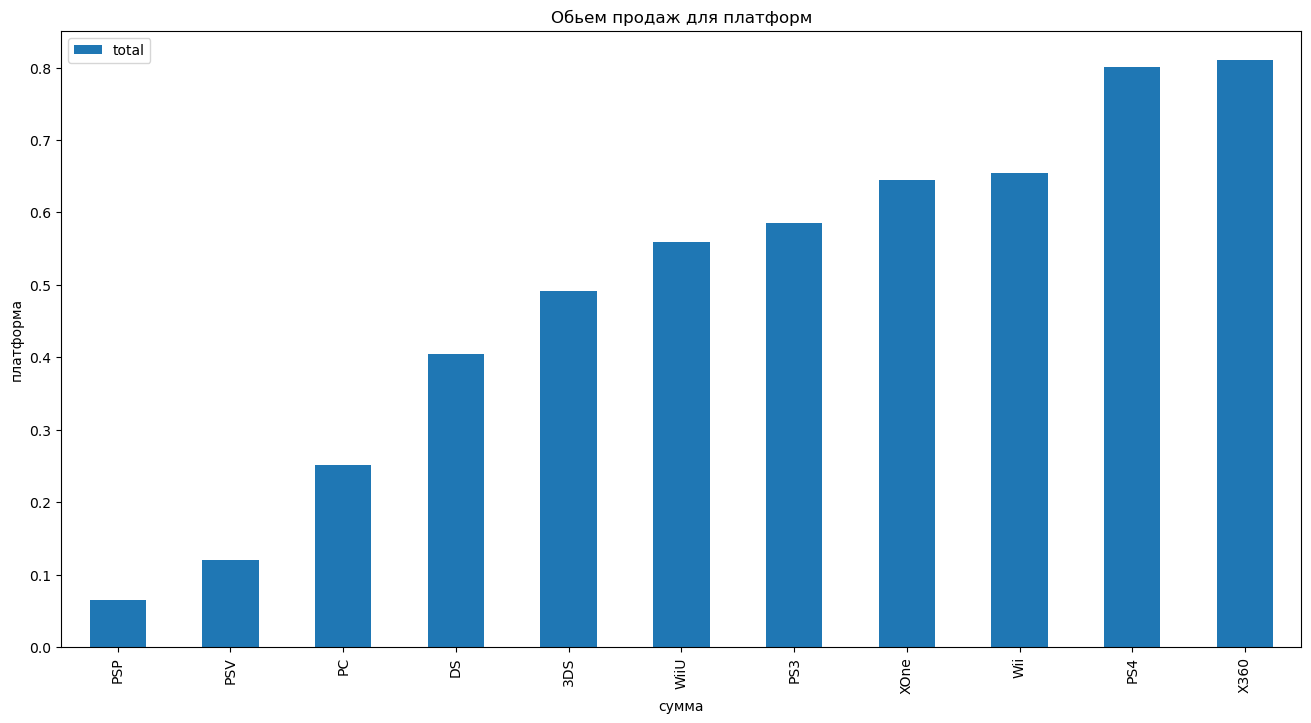

In [26]:
new_data.pivot_table(index='platform', values='total', aggfunc='mean').sort_values('total').plot(kind='bar', title='Обьем продаж для платформ', figsize=(16, 8))\
    .set(ylabel='платформа', xlabel='сумма')

3DS самые низкие доходы показывает. 
X360 самые высокие показатели, что интересно ~ от 0,15 и до 0,8 млн.
PS4 показатели от 0,1 до 0,75
Xone  от 0,1 до 0,65
Итого-у PS4 и X360 игры самые прибиыльные.

Выводы: нужно выделить лучшие платформы.
берём топ 3, но основываясь на логике, описанной про продажи игр для Ps. 
Выходит  надо исключить ps3 из топ3. и оставляем 2 лидера ps4 и x360. Это нам доказали оба графика

### Влияние отзывов пользователей и критиков на продажи внутри платформы PS4

Для анализа влияния отзывов пользователей и критиков на продажи.Возьмем ps4 как самую последнюю. Проанализируем корреляцию для total и user_score, и для total и critic_score.

In [27]:
cor_ps_data = new_data.query('platform =="PS4" and  user_score > 0') 

In [28]:
print(len(new_data.query('user_score > 0')))
print(len(new_data.query('critic_score > 0')))
print(len(new_data.query('user_score > 0 and critic_score > 0')))

1531
1312
1297


0.35193310929901417


count    257.00000
mean      69.88716
std       17.61078
min        0.00000
25%       65.00000
50%       73.00000
75%       80.00000
max       97.00000
Name: critic_score, dtype: float64

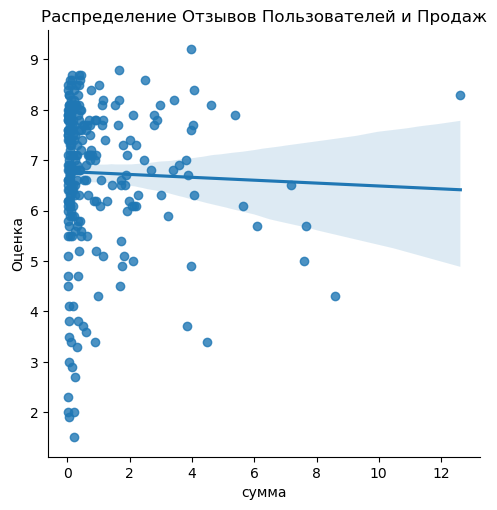

In [29]:
sb.lmplot(x='total', y='user_score', data=cor_ps_data).set(ylabel='Оценка',
                                                           xlabel='сумма', title='Распределение Отзывов Пользователей и Продаж')

print(cor_ps_data['critic_score'].corr(cor_ps_data['total']))
cor_ps_data['critic_score'].describe()

Зависимости отзывов пользователей на продажи нет, корреляция очень низкая.
Оценки весьма хорошие, средняя 6 балов.

In [30]:
cor_ps_data2 = new_data.query('platform =="PS4" and  critic_score > 0')

0.4065679020617814


count    252.000000
mean      72.091270
std       12.485992
min       19.000000
25%       66.000000
50%       73.000000
75%       80.000000
max       97.000000
Name: critic_score, dtype: float64

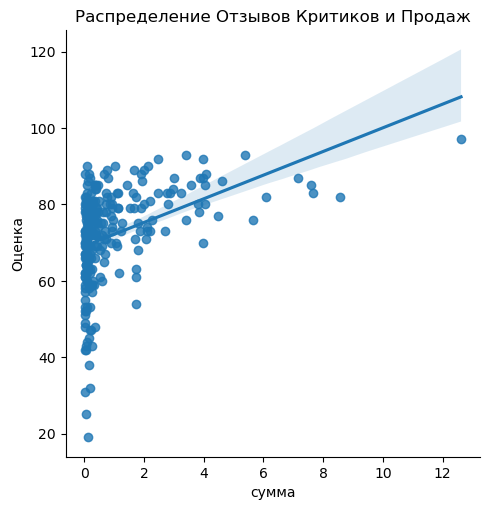

In [31]:
sb.lmplot(x='total', y='critic_score', data=cor_ps_data2).set(
    ylabel='Оценка', xlabel='сумма', title='Распределение Отзывов Критиков и Продаж')

print(cor_ps_data2['critic_score'].corr(cor_ps_data2['total']))
cor_ps_data2['critic_score'].describe()

Зависимости отзывов критиков также очень низакая, чуть выше зависимость... но также остаётся низкой.
Средняя также весьма хорошая 72 бала из 100. Хороший результат!

Итого: зависимости отзывов от продаж крайне низкие, слегка выше зависимость от отзывов экспертов.
Что интересно весьма высокие средние оценки.

In [32]:
new_data2 = new_data.query('user_score > 0') 
new_data_all = new_data.query('critic_score > 0')

9.96180320523309e-05


count    252.000000
mean       6.661508
std        1.657095
min       -1.000000
25%        6.100000
50%        7.000000
75%        7.800000
max        9.200000
Name: user_score, dtype: float64

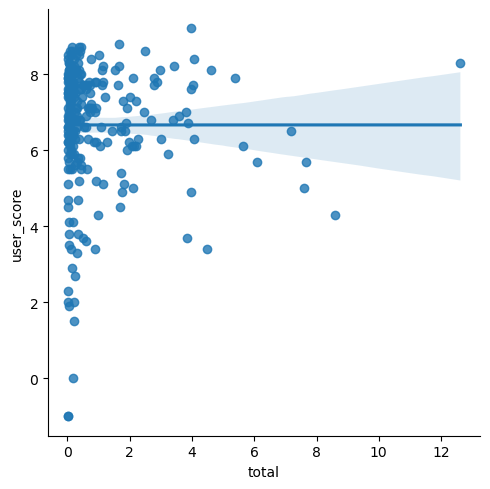

In [33]:
sb.lmplot(x='total', y='user_score', data=cor_ps_data2)
print(cor_ps_data2['user_score'].corr(cor_ps_data2['total']))
cor_ps_data2['user_score'].describe()

Тут всё аналогично как и для пс не чего не меняется 

0.3081967459207776


count    1312.000000
mean       72.258384
std        12.687087
min        13.000000
25%        66.000000
50%        74.000000
75%        81.000000
max        97.000000
Name: critic_score, dtype: float64

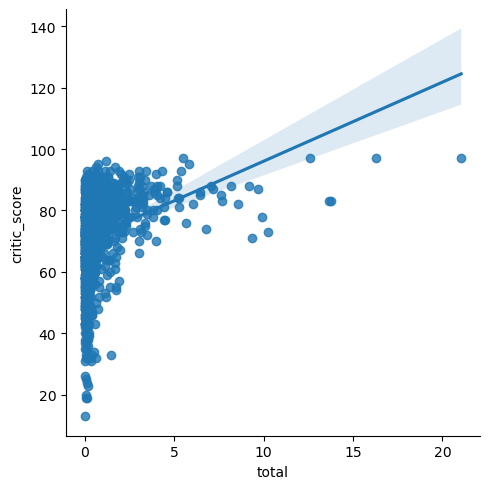

In [34]:
sb.lmplot(x='total', y='critic_score', data=new_data_all)
print(new_data_all['critic_score'].corr(new_data_all['total']))
new_data_all['critic_score'].describe()

Тут аналогично как и для PS

In [35]:
new_top_all = data.loc[data['release']>2012].groupby('platform')['release'].count().sort_values().tail(5).index.to_series()

Корреляция по платформе: XOne 0.3351397397926546


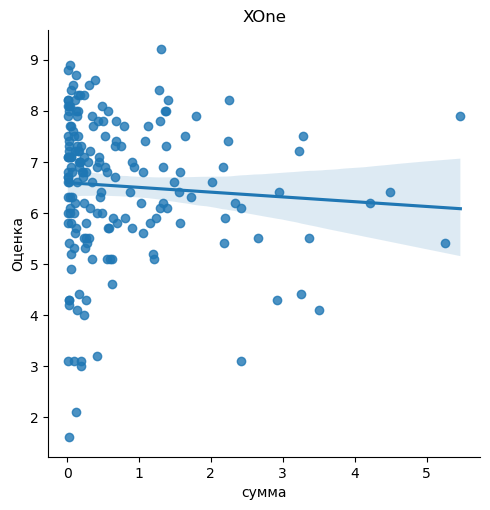

Корреляция по платформе: 3DS 0.2509946525161432


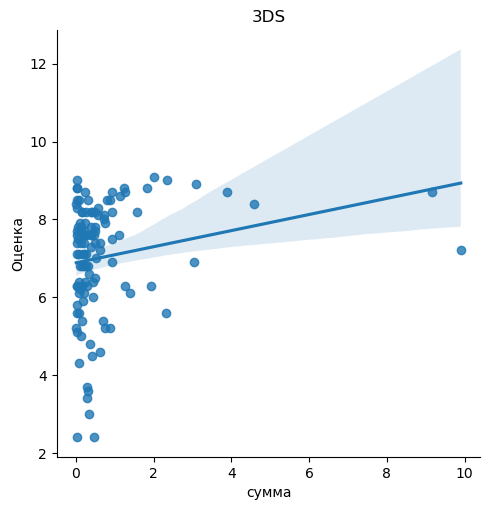

Корреляция по платформе: PS3 0.2024610251898954


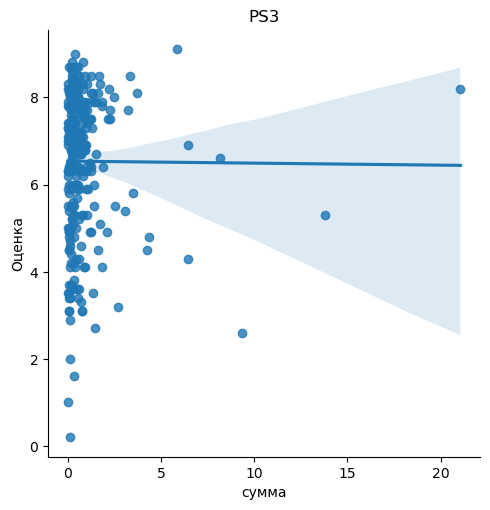

Корреляция по платформе: PSV 0.18745111220623917


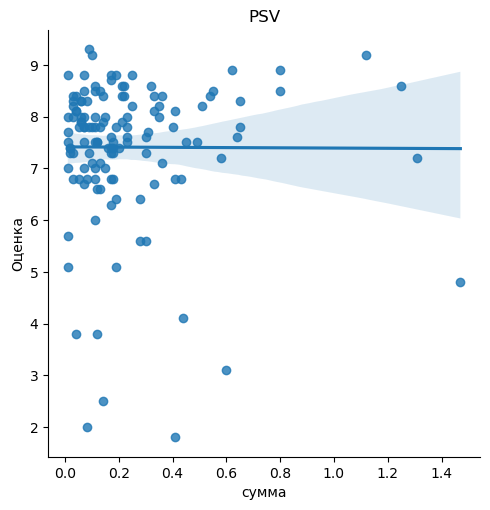

Корреляция по платформе: PS4 0.35193310929901417


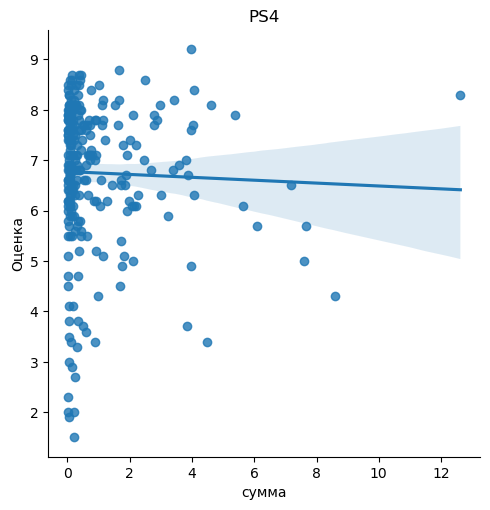

In [36]:
for platform in new_top_all:
    sb.lmplot(x='total', y='user_score', data=new_data2.loc[new_data2['platform'] == platform]).set(
        ylabel='Оценка', xlabel='сумма', title=platform)
    print('Корреляция по платформе:', platform, new_data2.loc[new_data2['platform'] == platform, 'critic_score'].corr(
        new_data2.loc[new_data2['platform'] == platform, 'total']))
    plt.show()

Итого: зависимости отзывов от продаж крайне низкие, слегка выше зависимость от отзывов экспертов. 
Что интересно, оценки вообщем то по всем платформам средняя одинаковая.

### Общее распределение игр по жанрам. 


               total
genre               
Action        441.12
Shooter       304.73
Role-Playing  192.80
           total
genre           
Puzzle      4.89
Strategy   13.34
Adventure  29.43


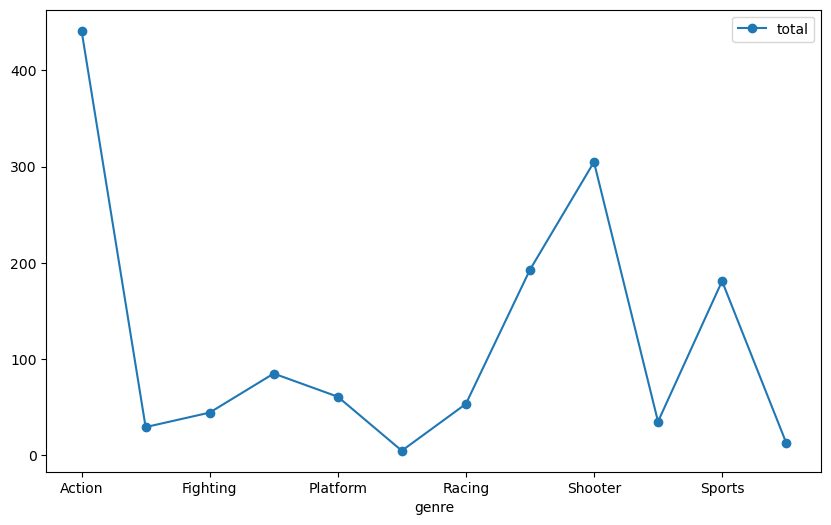

In [37]:
genre_new_data = new_data.pivot_table(
    index='genre', values='total', aggfunc='sum')
genre_new_data.plot(y='total', figsize=(10, 6), style='-o')
print(genre_new_data.sort_values('total', ascending=False).head(3))
print(genre_new_data.sort_values('total').head(3))

<AxesSubplot:ylabel='total'>

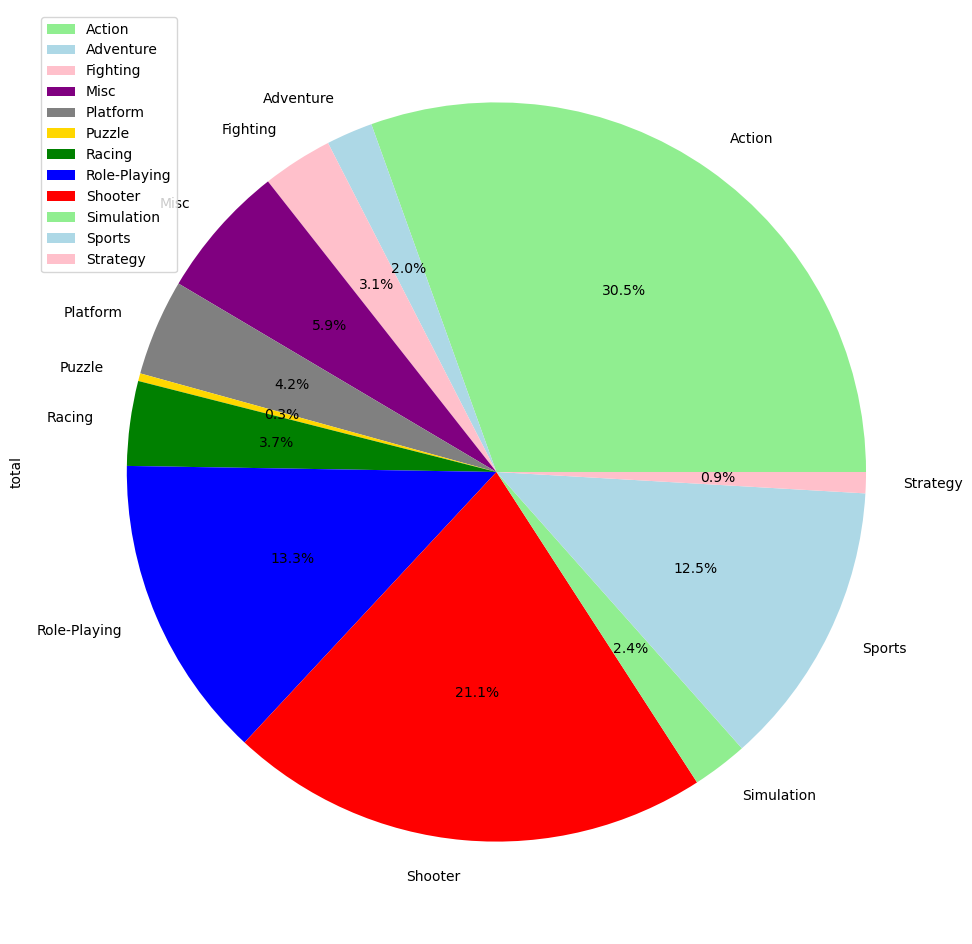

In [38]:
colors = ['lightgreen', 'lightblue', 'pink', 'purple',
          'grey', 'gold', 'green', 'blue', 'red', ]
genre_new_data.plot(y='total', kind='pie', figsize=(
    12, 12), autopct='%1.1f%%', colors=colors)

Топ 3 жанров по выручке, видно по графику, а также вывел запросом
 1. Action	291.94 -- 31,5%
 2. Shooter	221.16 -- 23.6%
 3. Sports	133.30 -- 14.1%

Самые низкие результаты:
1. Puzzle      1.84 -- 0.2%
2. Strategy    2.67 -- 0.4%
3. Adventure   9.69 -- 1.9%   

если 1 игра в одной платформе бьёт все рекорды, её жанр будет популярен. и её жанр будет прибыльным.


In [39]:
new_data33 = new_data.pivot_table(
    index='genre', values='total', aggfunc='median')
new_data33

,total
genre,
Action,0.120
Adventure,0.030
Fighting,0.130
Misc,0.120
Platform,0.210
Puzzle,0.045
Racing,0.140
Role-Playing,0.140
Shooter,0.440


В разрезе платформ:

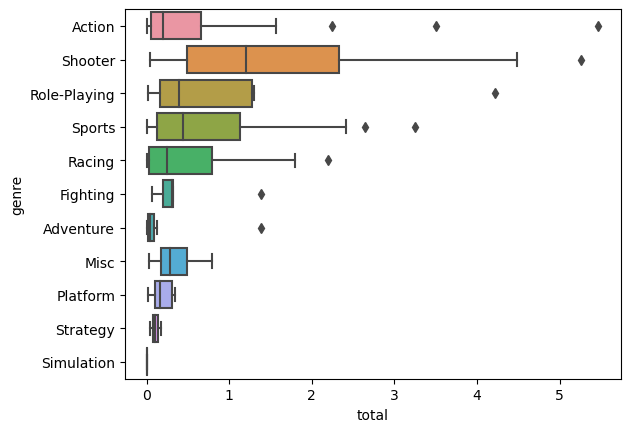

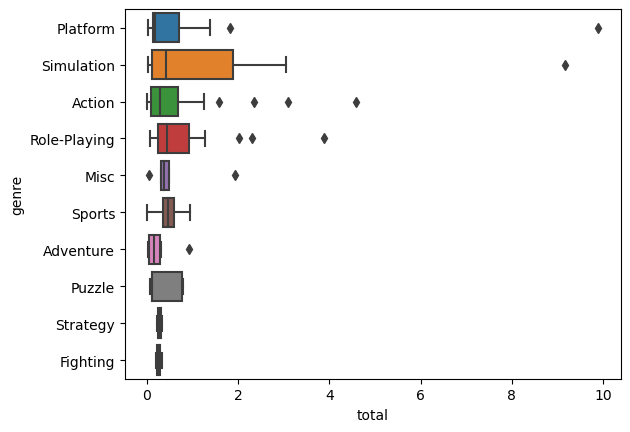

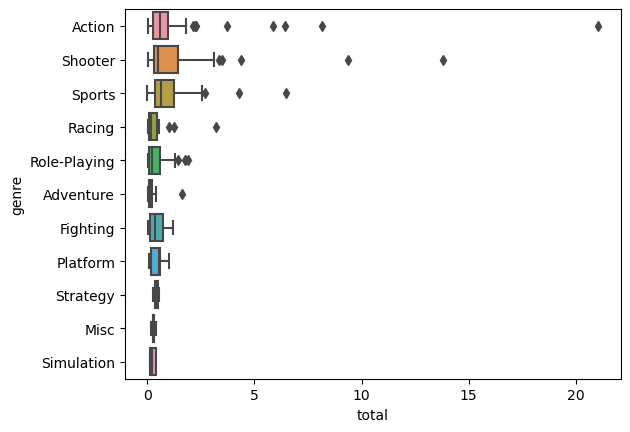

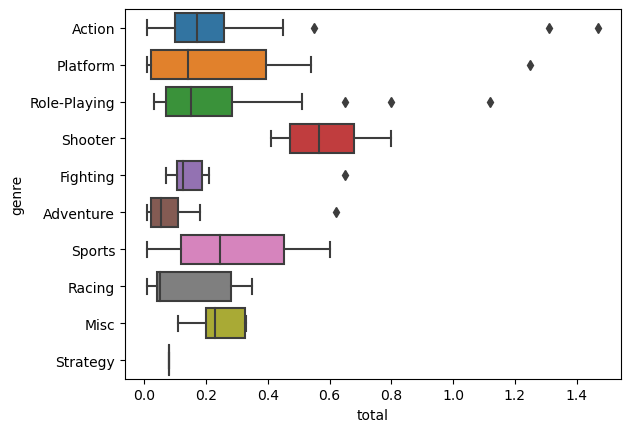

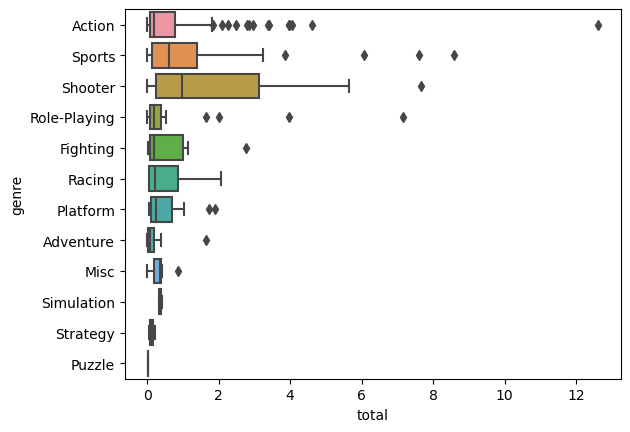

In [40]:
for platform in new_top_all:
    data_box = new_data2.loc[new_data2['platform'] == platform]
    x = data_box['total']
    y = data_box['genre']
    sb.boxplot(x=x, y=y)
    plt.show()

В разрезе жанров, видно , что везде практически есть игры которые тянут в топ. Колосально Action,Fighting, Role-Playing, Shooter

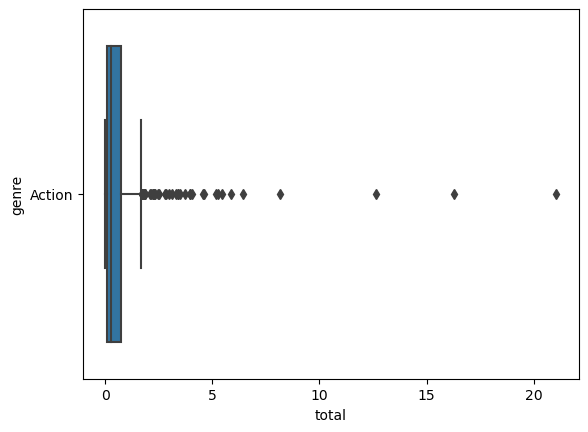

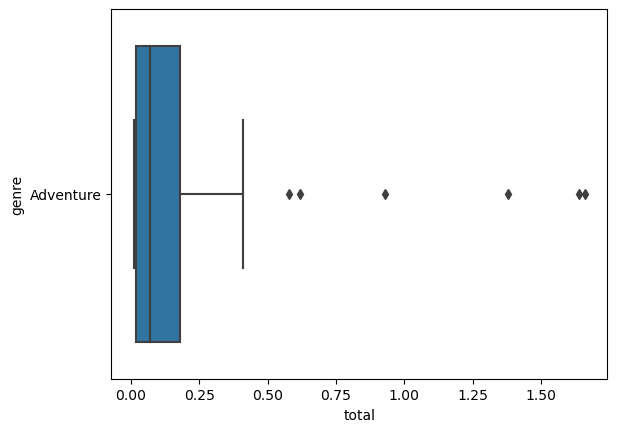

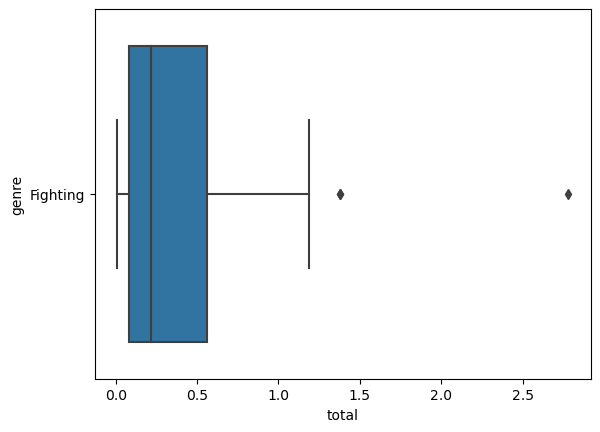

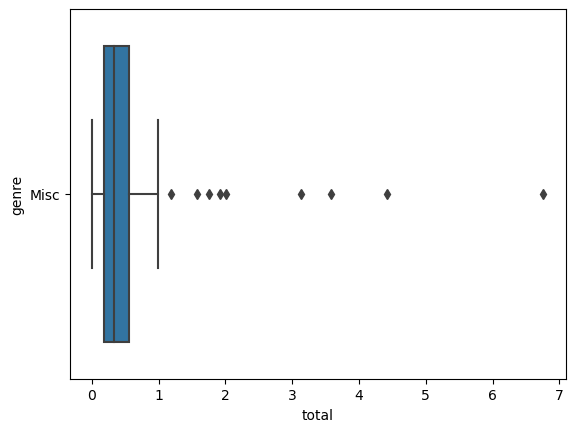

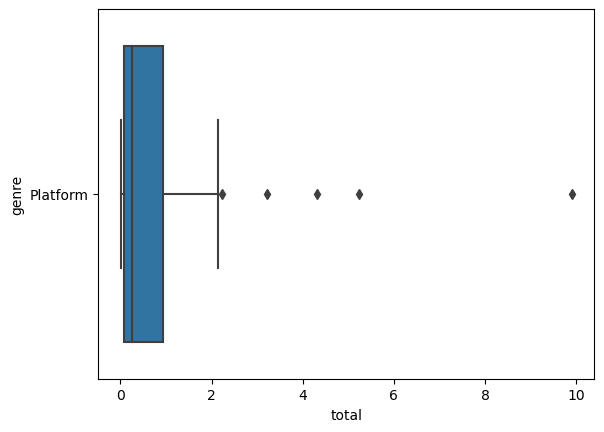

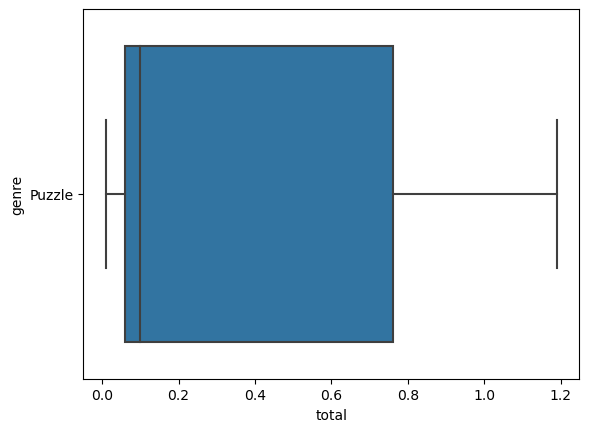

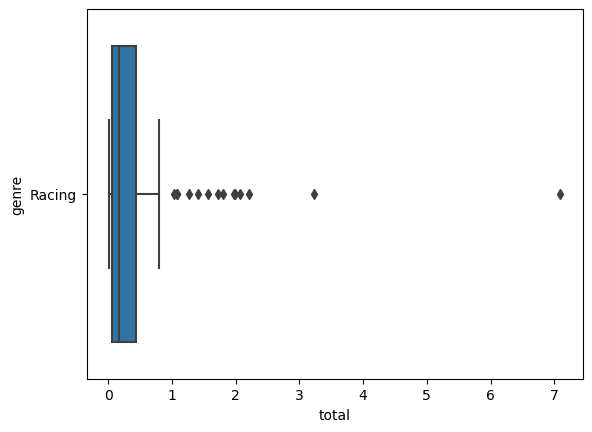

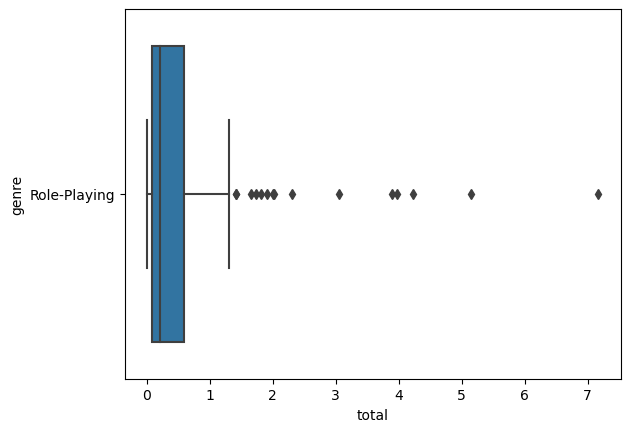

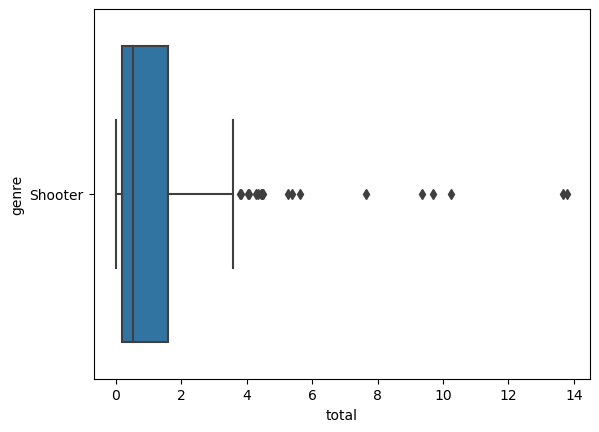

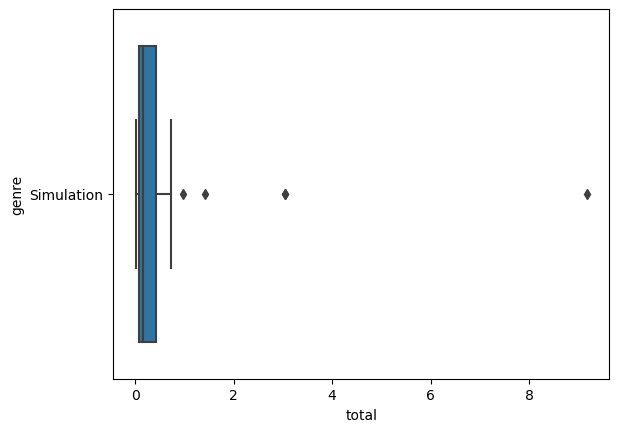

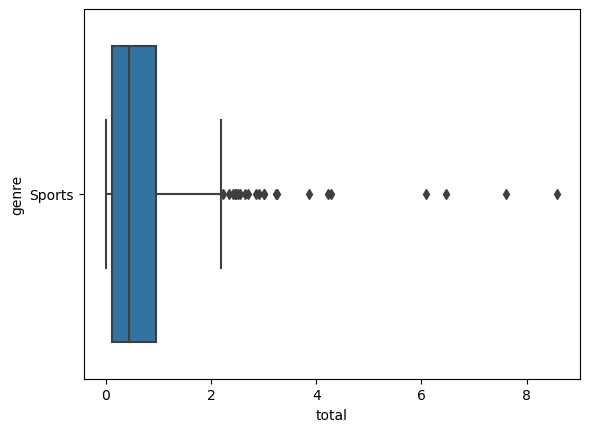

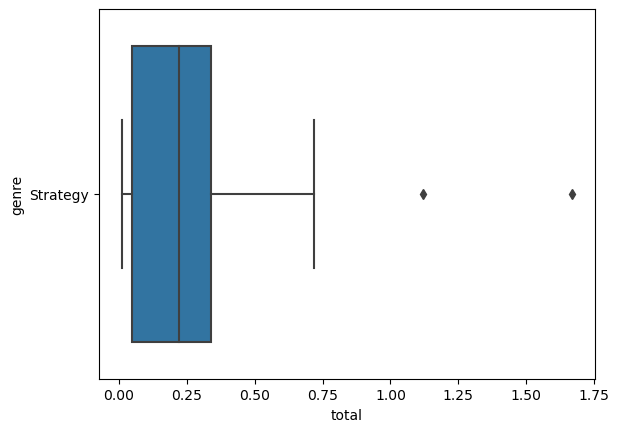

In [41]:
genre_new_data.index.to_series()
genre_box = genre_new_data.index.to_series()
for genre in genre_box:
    data_box = new_data2.loc[new_data2['genre'] == genre]
    x = data_box['total']
    y = data_box['genre']
    sb.boxplot(x=x, y=y)
    plt.show()

Посмотрим, допустим в жанре экшен кто перевес даёт ... Grand Theft Auto V    как раз 50+млн

<AxesSubplot:ylabel='total'>

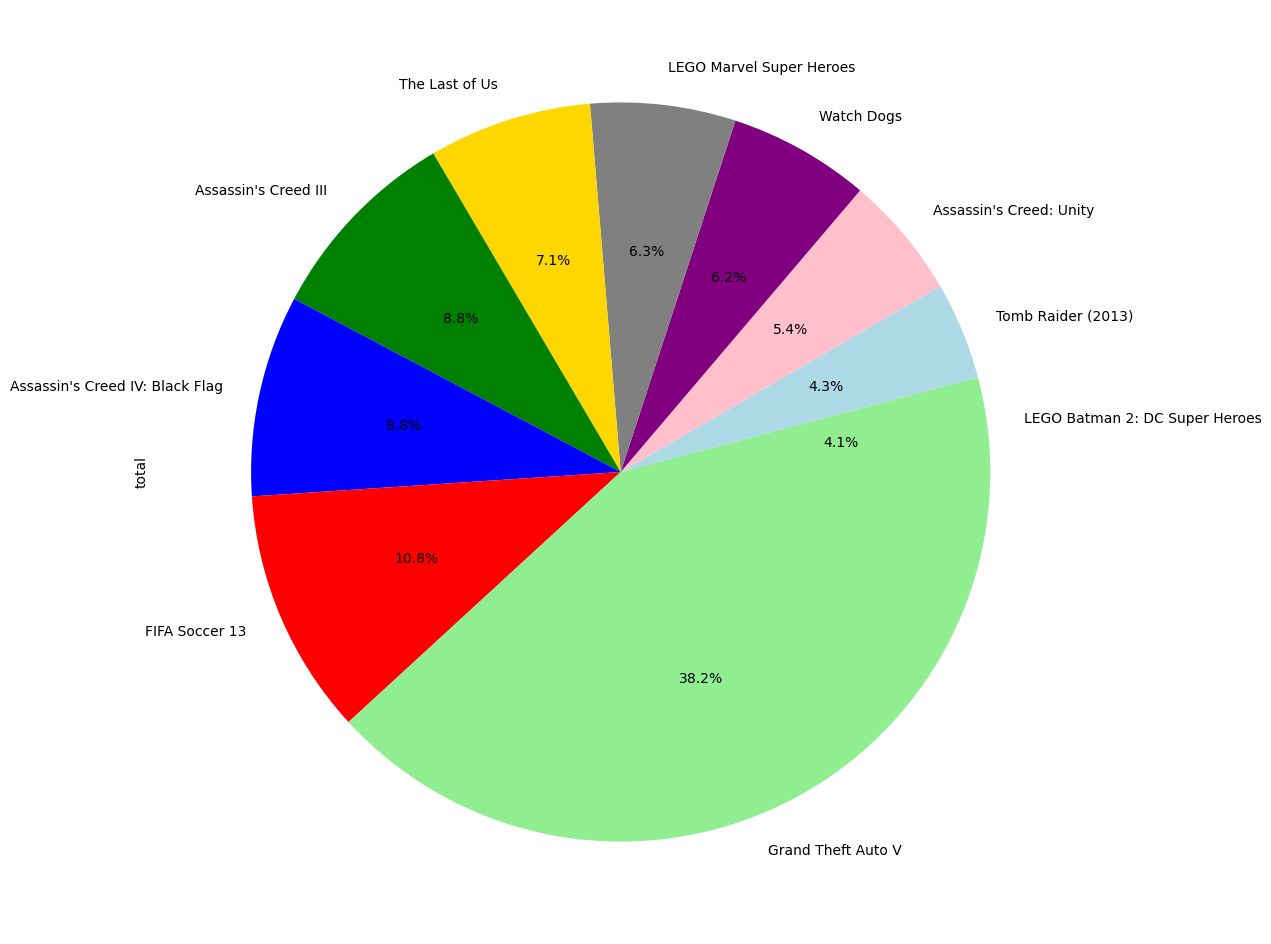

In [42]:
plot_data = new_data.loc[new_data['genre'] == 'Action'].groupby(
    'name')['total'].sum().sort_values().tail(10)
plot_data.plot(y='total', kind='pie', figsize=(
    12, 12), autopct='%1.1f%%', colors=colors)

Топ 3 жанров по выручке, видно по графику, а также вывел запросом

Action 291.94 -- 31,5%
Shooter 221.16 -- 23.6%
Sports 133.30 -- 14.1%
Самые низкие результаты:

Puzzle 1.84 -- 0.2%
Strategy 2.67 -- 0.4%
Adventure 9.69 -- 1.9%

Но встречаются жанры где доминирует конкретная игра такие как Action,Fighting, Role-Playing, Shooter.
в жанре Action доминирует Grand Theft Auto V  почти 40% продаж этого жанра приходиться на неё.

Итого: Из выше описанного делаем вывод самым прибыльным жанром будет Shooter с медианной выручки 0.440 млн.$


## Портрет пользователя каждого региона


NA популярные платформы топ 5

<AxesSubplot:ylabel='name'>

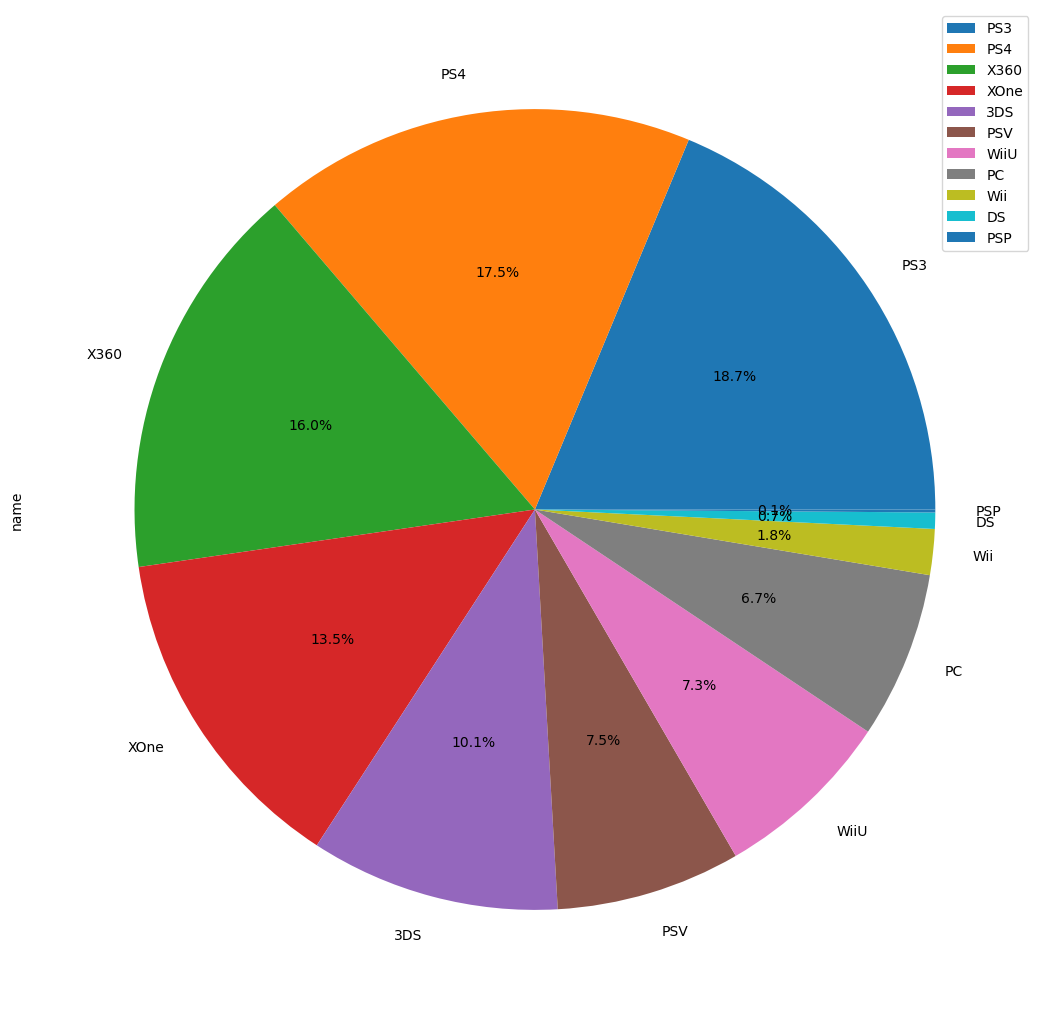

In [43]:
new_data_na = data.loc[(data['na_sales'] > 0) & (data['release'] >= 2012)]
new_data_na.pivot_table(index='platform', values='name', aggfunc='count').sort_values(
    'name', ascending=False).plot(y='name', kind="pie", figsize=(13, 13), autopct='%1.1f%%')

Вывод: в Na Топ5, начиная с 2012года:
1. PS3  --  18.7%
2. PS4  --  17.5%
3. X360 --  16.0%
4. Xone --  13.5%
5. 3DS  --  10.1%

### NA популярные жанры топ 5

<AxesSubplot:ylabel='name'>

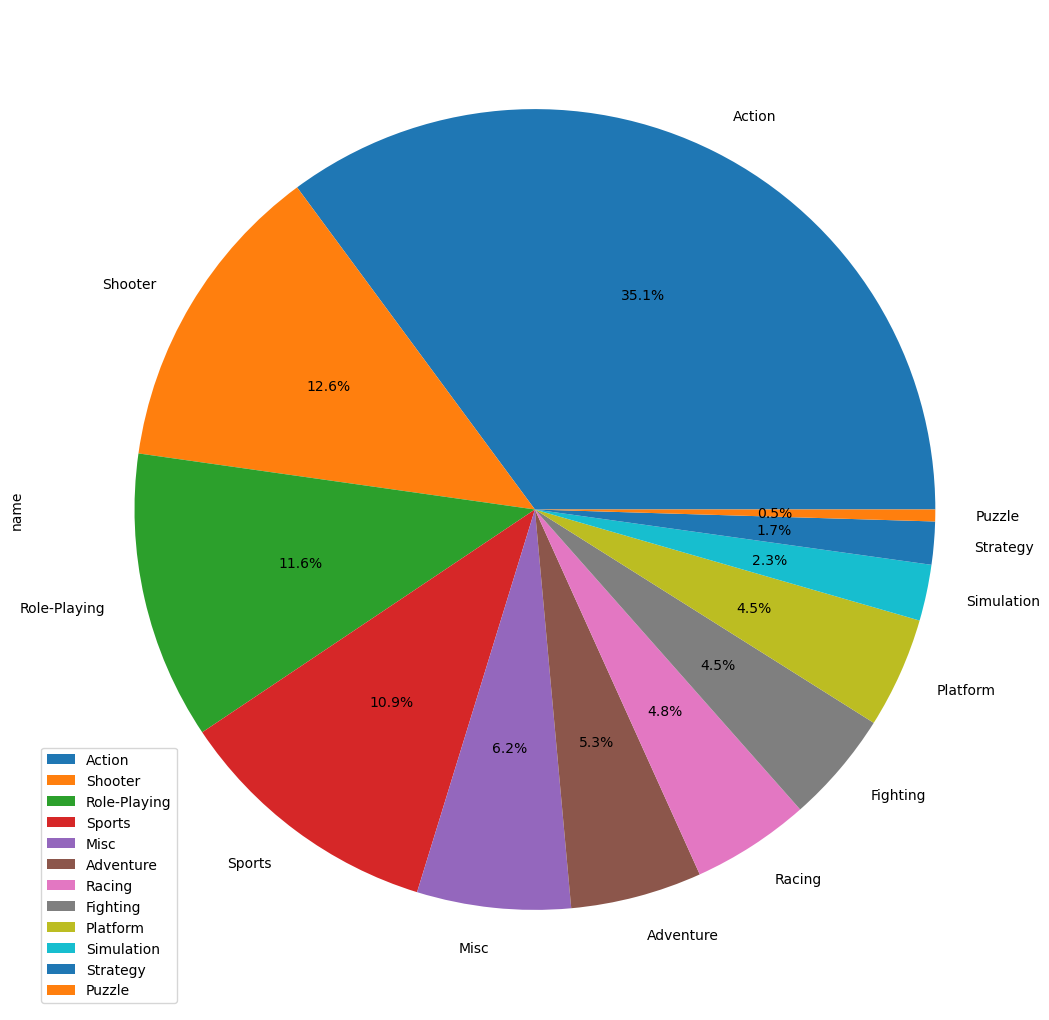

In [44]:
new_data_na.pivot_table(index='genre', values='name', aggfunc='count').sort_values(
    'name', ascending=False).plot(y='name', kind="pie", figsize=(13, 13), autopct='%1.1f%%')

Топ-5  популярных жанров в регионе NA:
1. Action -- 35.1% 
2. Shooter -- 12.6% 
3. Role-Playing -- 11.6% 
4. Sports -- 10.9% 
5. Misc -- 6.2%  

Влияние рейтинга ESRB на продажи в регионе NA

<AxesSubplot:xlabel='rating'>

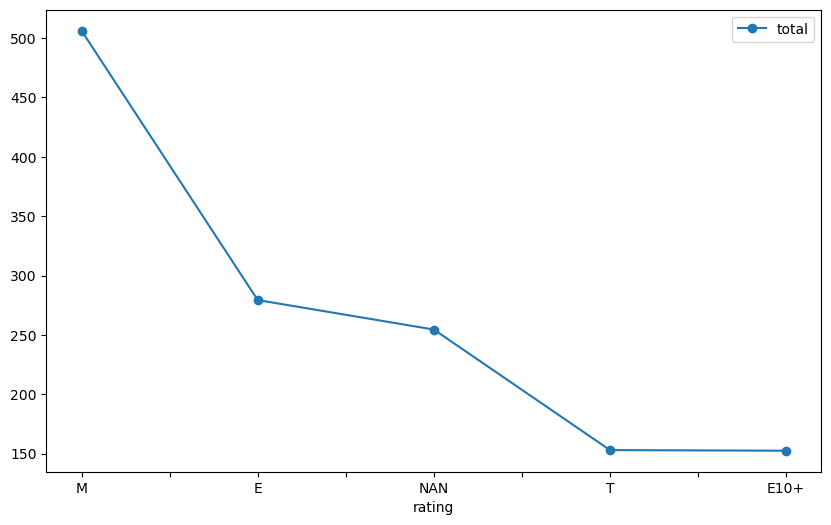

In [45]:
new_data_na.pivot_table(index='rating', values='total', aggfunc='sum').sort_values(
    'total', ascending=False).plot(y='total', figsize=(10, 6), style='-o')

Влияет, притом ощутимо. Явно с рейтингом М максимальнео колличество продаж. А с рейтингом Т и Е10+ гораздо меньше по сравнению с остальными

 Влияния в ESRB других регионах. EU популярные платформы топ 5

<AxesSubplot:ylabel='name'>

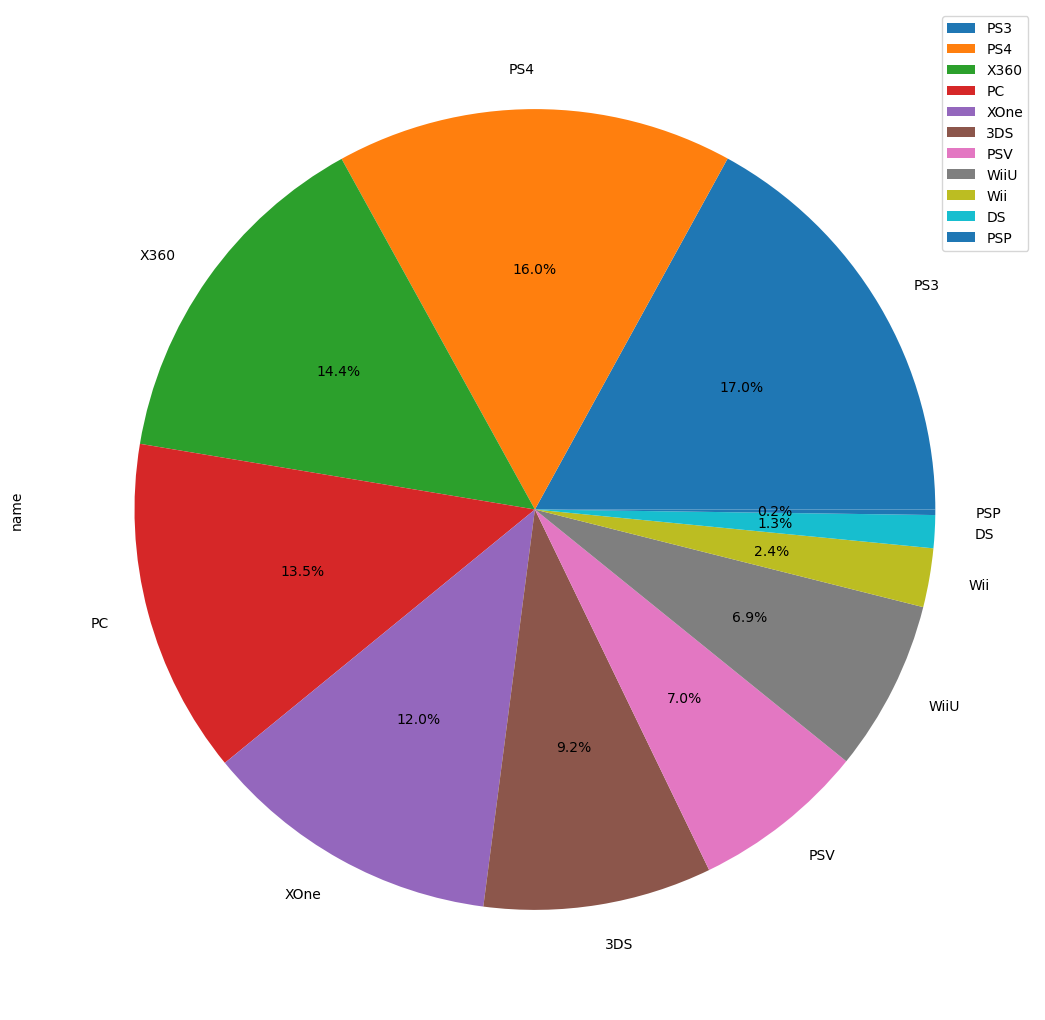

In [46]:
new_data_eu = data.loc[(data['eu_sales'] > 0) & (data['release'] >= 2012)]
new_data_eu.pivot_table(index='platform', values='name', aggfunc='count').sort_values(
    'name', ascending=False).plot(y='name', kind="pie", figsize=(13, 13), autopct='%1.1f%%')

Топ-5 популярных платформ в регионе EU:
1. PS3 -- 17% 
2. PS4 -- 16.0% 
3. X360 -- 14.4% 
4. PC -- 13.5% 
5. XOne -- 12%

### Популярные жанры топ 5

<AxesSubplot:ylabel='name'>

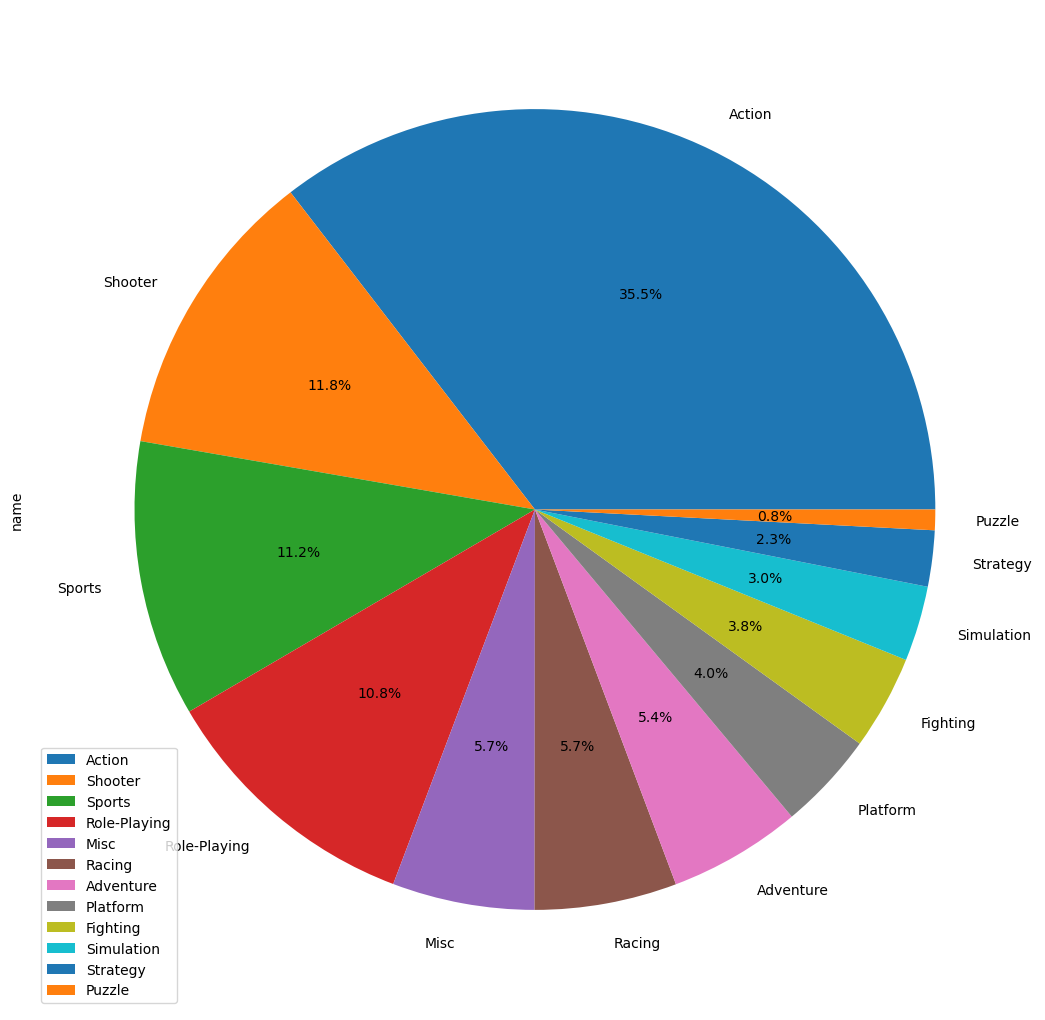

In [47]:
new_data_eu.pivot_table(index='genre', values='name', aggfunc='count').sort_values(
    'name', ascending=False).plot(y='name', kind="pie", figsize=(13, 13), autopct='%1.1f%%')

Топ-5  популярных жанров в регионе EU:
1. Action -- 35.5% 
2. Shooter -- 11.8% 
3. Sports -- 11.2% 
4. Role-Playing -- 10.8% 
5. Misc -- 5.7% 

<AxesSubplot:xlabel='rating'>

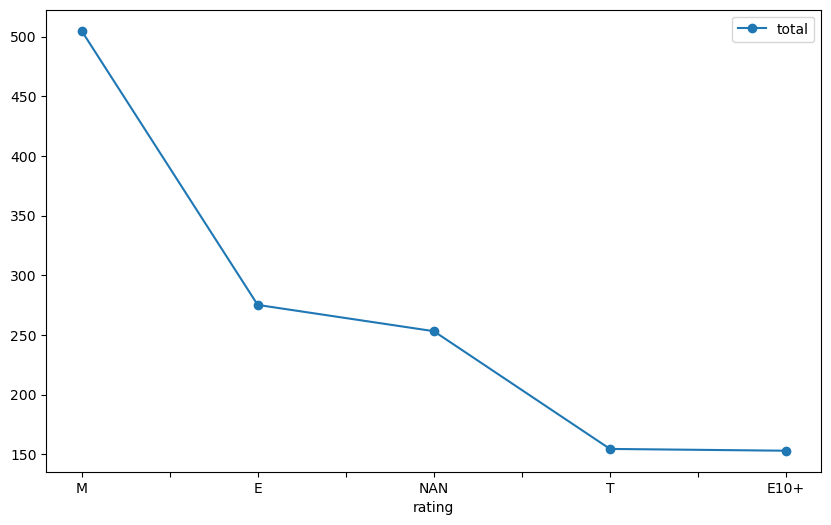

In [48]:
new_data_eu.pivot_table(index='rating', values='total', aggfunc='sum').sort_values(
    'total', ascending=False).plot(y='total', figsize=(10, 6), style='-o')

Влияет, притом ощутимо. Явно с рейтингом М максимальнео колличество продаж. А с рейтингом Т и Е10+ гораздо меньше по сравнению с остальными.

Аналогичным способ посмотрим на влияния в других регионах. jp популярные платформы топ 5

<AxesSubplot:ylabel='name'>

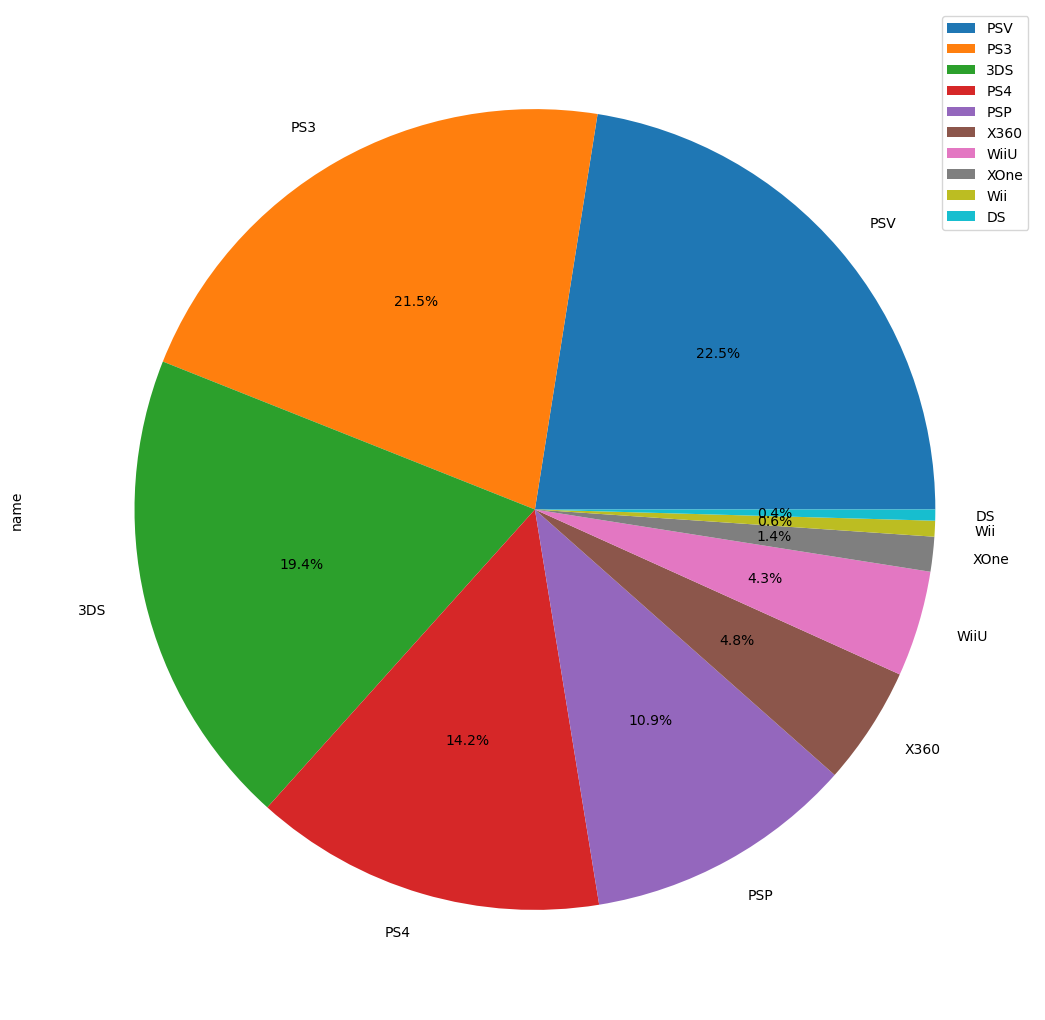

In [49]:
new_data_jp = data.loc[(data['jp_sales'] > 0) & (data['release'] >= 2012)]
new_data_jp.pivot_table(index='platform', values='name', aggfunc='count').sort_values(
    'name', ascending=False).plot(y='name', kind="pie", figsize=(13, 13), autopct='%1.1f%%')

Топ 5 популярных платформ в регионе jp:
1. PSV -- 22.5% 
2. PS3 -- 21.5% 
3. 3DS -- 19.4% 
4. PS4 -- 14.2% 
5. PSP -- 10,9% 

 популярные жанры топ 5

<AxesSubplot:ylabel='name'>

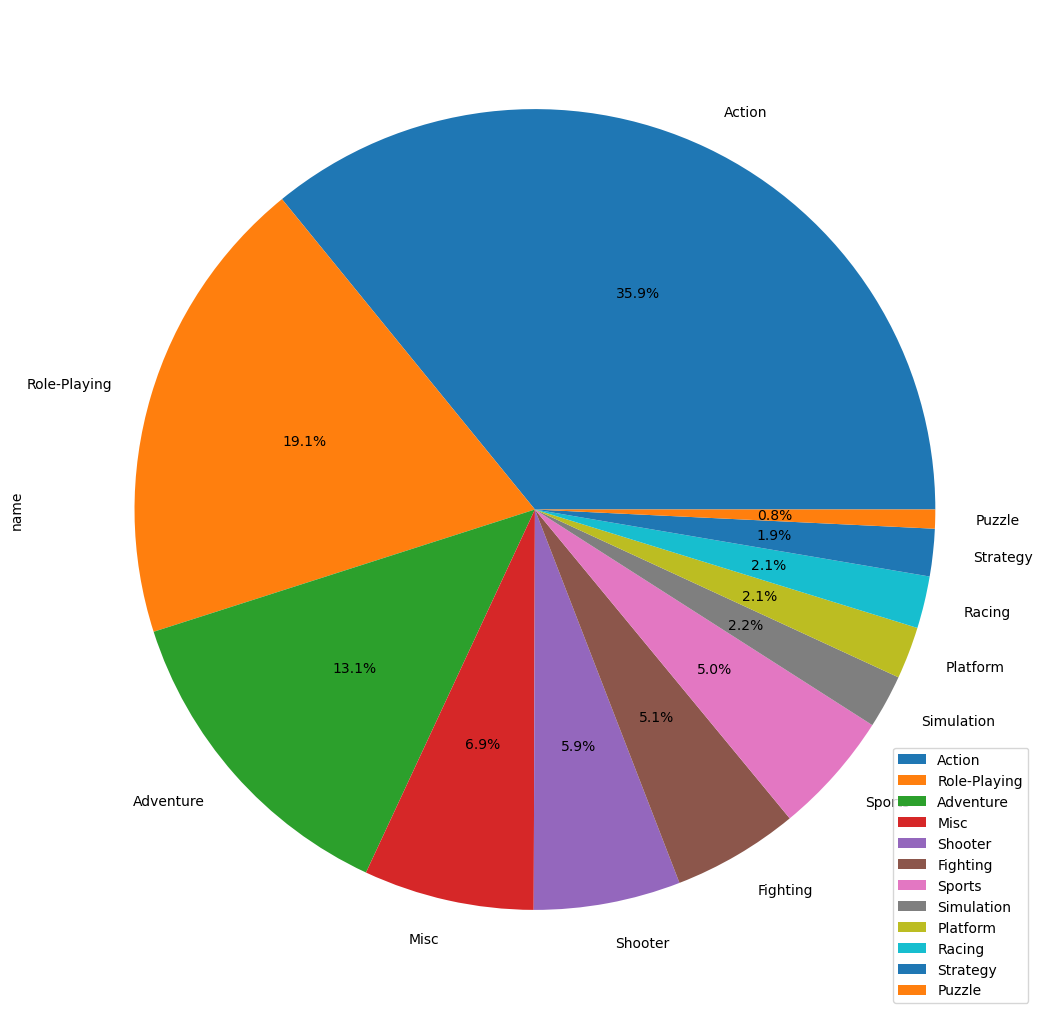

In [50]:
new_data_jp.pivot_table(index='genre', values='name', aggfunc='count').sort_values(
    'name', ascending=False).plot(y='name', kind="pie", figsize=(13, 13), autopct='%1.1f%%')

Топ-5 опулярных жанров в регионе jp:
1. Action -- 35.9% 
2. Role-Playing -- 19.1% 
3. Adventure -- 13.1% 
4. Misc -- 6.9% 
6. Shooter -- 5.9% 

<AxesSubplot:xlabel='rating'>

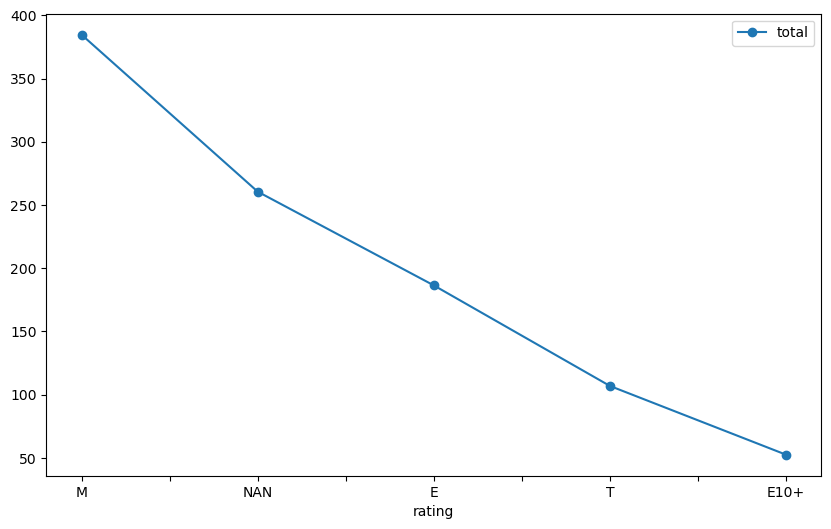

In [51]:
new_data_jp.pivot_table(index='rating', values='total', aggfunc='sum').sort_values(
    'total', ascending=False).plot(y='total', figsize=(10, 6), style='-o')

Выводы: Проанализировав данные с 3 регионов, можно понять:
        1. EU и NA очень похожи в разрезе выбора платформ, в то же время у jp топ популярностей платформ отличается.
        2. Жанр Action самый популярный не зависимо от региона.
        3. Зависимость от рейтига ESRB идентичная во всех регионах, лучший результат с рейтингом М.

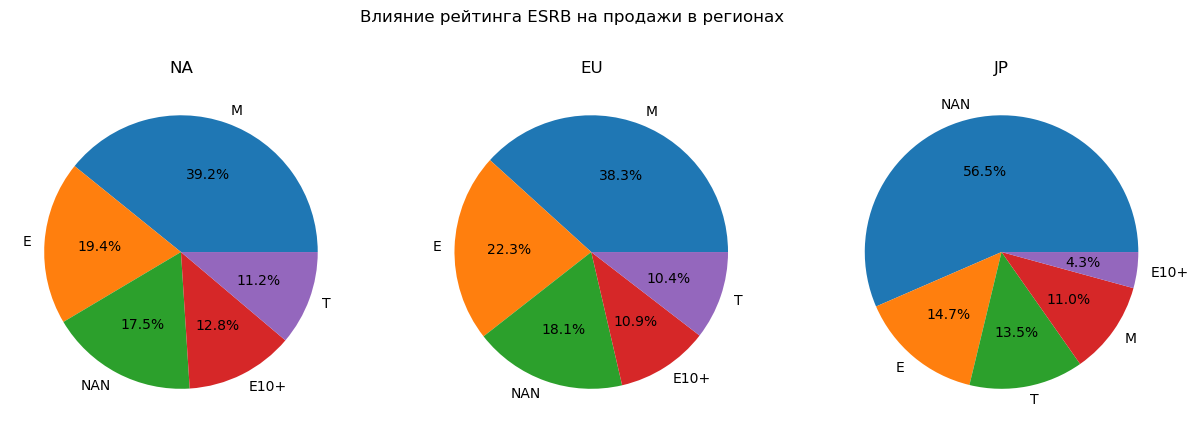

In [52]:
games_fresh = data.query('release >= 2012').copy()
countries = games_fresh.columns[4:7]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Влияние рейтинга ESRB на продажи в регионах')
for i in range(3):
    df_i = (games_fresh.groupby('rating')[countries[i]].sum().
            reset_index().
            sort_values(countries[i], ascending=False, ignore_index=True))

    axs[i].pie(df_i[countries[i]], labels=df_i['rating'], autopct='%1.1f%%')
    axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

## Гипотезы


### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза 
Средние пользовательские рейтинги на XOne равны средним пользовательским рейтингам  PC
Альтернативная:
Средние пользовательские рейтинги платформы XOne не равны средним пользовательским рейтингам платформы PC

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

In [53]:
from scipy import stats as st
sample_1 = data.loc[(data['platform'] == 'XOne') & (
    data['release'] >= 2012) & (data['user_score'] > 0)]['user_score']
sample_2 = data.loc[(data['platform'] == 'PC') & (
    data['release'] >= 2012) & (data['user_score'] > 0)]['user_score']
results = st.ttest_ind(
    sample_1,
    sample_2, equal_var=False)
# вызов метода для проверки гипотезы
results.pvalue
alpha = .05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу ')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

0.5489537965134912
Не получилось отвергнуть нулевую гипотезу 


Не получилось отвергнуть нулевую гипотезу. 
Выходит Средние пользовательские рейтинги на XOne равны средним пользовательским рейтингам  PC

### Средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гипотеза 
Средние пользовательские рейтинги жанра  Action равны средним пользовательским рейтингам  Sports
Альтернативная:
Средние пользовательские рейтинги жанра  Action не равны средним пользовательским рейтингам платформы Sports

In [54]:
sample_1 = data.loc[(data['genre'] == 'Action') & (
    data['release'] >= 2012) & (data['user_score'] > 0)]['user_score']
sample_2 = data.loc[(data['genre'] == 'Sports') & (
    data['release'] >= 2012) & (data['user_score'] > 0)]['user_score']
results = st.ttest_ind(
    sample_1,
    sample_2, equal_var=False)
# вызов метода для проверки гипотезы
results.pvalue
alpha = .05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу ')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

4.24307776572644e-20
Отвергаем нулевую гипотезу 


Отвергнута нулевая гипотеза
Выходит Средние пользовательские рейтинги жанра  Action не равны средним пользовательским рейтингам платформы Sports

Общий вывод
При анализа было выявлено сколько игр выпускалось в разные годы.Были изучены продажи для каждой платформы и определены топ платформы  по продажам. Было изучено влияние оценки пользователей и критиков на продажи для каждоый платформы, проведено сравнение зависимости продаж игр на всех платформах.Получены данные по игровым жанрам и дохода жанров.
Зависимости отзывов от продаж крайне низкие, слегка выше зависимость от отзывов экспертов. Что интересно, оценки вообщем-то по всем платформам средняя одинаковая.
Выявлено, что Action самая популярная категория игр в независимости от региона,а Puzzle аутсайдер.
Action 291.94 -- 31,5%
Puzzle 1.84 -- 0.2%
в жанре Action доминирует Grand Theft Auto V  почти 40% продаж этого жанра приходиться на неё. по этой причине мы будет опираться в дальнейшем на медианну,а тут другой лидер  самым прибыльным жанром будет Shooter с медианной выручки 0.440 млн.$
Игр с рейтингом ESRB равным M больше всего, а  с рейтингом E10+ аутсайдер не зависимо от региона.
Отмечу , что PS3 весьма популярная платформа не зависимо от региона.
Отличия регионов в платформах если топ 1 EU и  NA яв-ся PS3, то в jp будет PSV.
В результате проверок гипотез  выяснилос, что:
Средние пользовательские рейтинги платформ Xbox One и PC равны.
Средние пользовательские рейтинги жанров Action и Sports разные.


Сотвественно для регионов EU и NA платформа для рекламы и и.д  будет PS4/X360 (PS4 последняя из PS и она в топе) и жанр action либо shooter(меданна продаж у shooter болшьше).
Для региона JP ситуация иная платформы PSV/PS4(опять же возьмем ps4 т.к. она последняя из ps,а суммарно ps3 +ps4= топ.)и жанр Action/Role-Playing.
Рейтинг из -за большого числа пропусков у меня очень под сомнением. уж слишком влияют пропуски на результат.